In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./Train.csv')
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [3]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [4]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


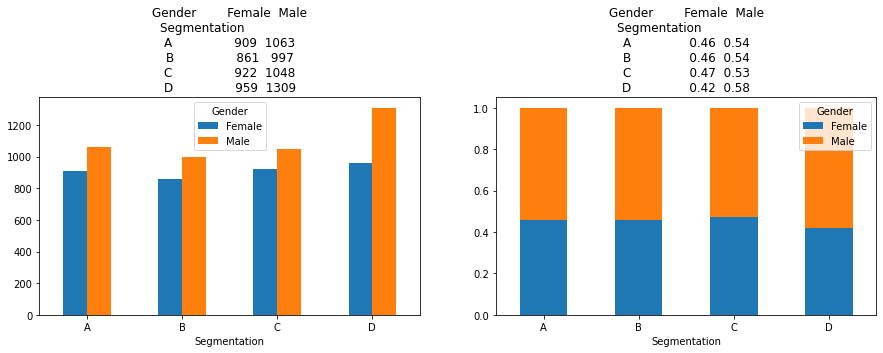

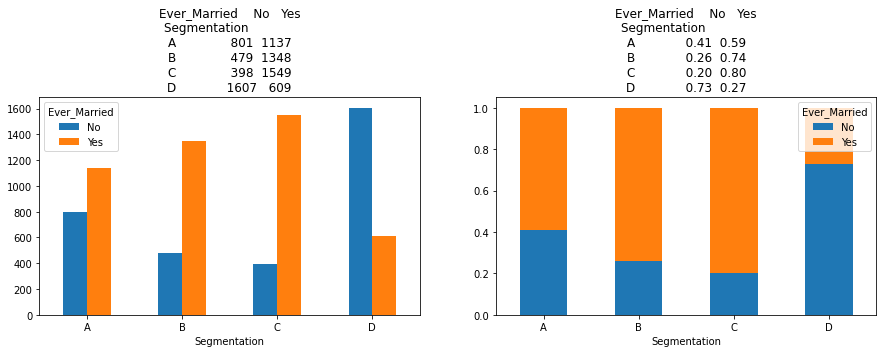

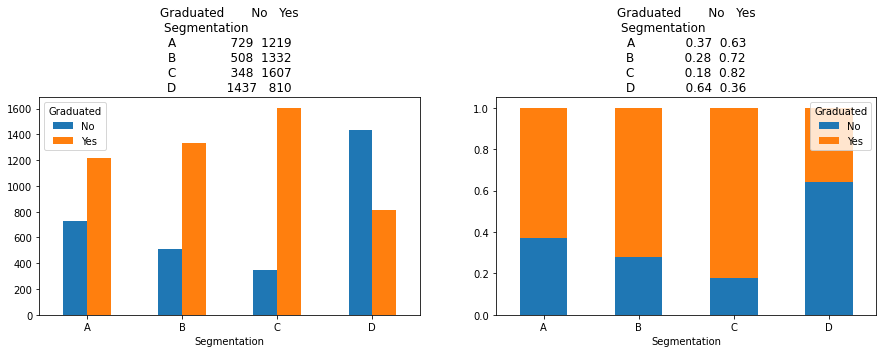

In [5]:
# Segmentation & Gender
ax1 = df.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)

ax2 = df.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))

# Segmentation & Ever_Married
ax1 = df.groupby(["Segmentation"])["Ever_Married"].value_counts().unstack().round(3)

ax2 = df.pivot_table(columns='Ever_Married',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))


# Segmentation & Graduated
ax1 = df.groupby(["Segmentation"])["Graduated"].value_counts().unstack().round(3)

ax2 = df.pivot_table(columns='Graduated',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))


plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

df = df.dropna()
df_new = df.copy()

cat = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

le = LabelEncoder()
df_new
for c in cat:
    df_new[c] = le.fit_transform(df[c])

In [7]:
df_new['Segmentation'] = df_new['Segmentation'].replace(['A', 'B', 'C', 'D'], [1, 2, 3, 4])
df_new

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,4
2,466315,0,1,67,1,2,1.0,2,1.0,5,2
3,461735,1,1,67,1,7,0.0,1,2.0,5,2
5,461319,1,1,56,0,0,0.0,0,2.0,5,3
6,460156,1,0,32,1,5,1.0,2,3.0,5,3
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,1,1,41,1,0,0.0,1,5.0,5,2
8064,464685,1,0,35,0,4,3.0,2,4.0,3,4
8065,465406,0,0,33,1,5,1.0,2,1.0,5,4
8066,467299,0,0,27,1,5,1.0,2,4.0,5,2


In [8]:
df_f = df_new.iloc[:, 1:-1]
df_t = df_new.iloc[:,-1]

In [9]:
df_f.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000
mean,0.551688,0.591748,43.536084,0.637509,2.700975,2.629107,1.350638,2.841110,4.178395
std,0.497358,0.491547,16.524054,0.480755,2.519285,3.405365,0.852364,1.524743,1.409265
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,1.000000,1.000000,41.000000,1.000000,2.000000,1.000000,2.000000,2.000000,5.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,5.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,6.000000


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_f = scaler.fit_transform(df_f)

In [11]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

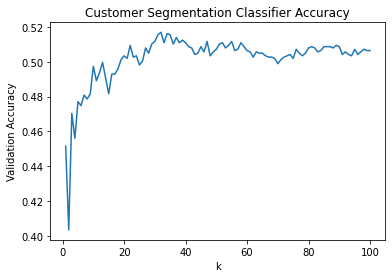

31


In [12]:
train_X, test_X, train_Y, test_Y = np.array(train_test_split(df_f, df_t, test_size = 0.2, random_state = 100))

k_list = range(1,101)
accuracies = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(train_X, train_Y.ravel())
  accuracies.append(knn.score(test_X, test_Y))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Customer Segmentation Classifier Accuracy")
plt.show()
max_index_col = np.argmax(accuracies, axis=0)
print(max_index_col) # finding the best k value

In [13]:
knn = KNeighborsClassifier(n_neighbors = 35)
knn.fit(train_X, train_Y.ravel())

print(knn.score(test_X, test_Y))

0.5153788447111778


In [14]:
test = pd.read_csv('./Test.csv')
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [15]:
test = test.iloc[:, 1:]

cat = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

le_test = LabelEncoder()

for c in cat:
    test[c] = le.fit_transform(test[c])
    
test = test.dropna()

In [16]:
scaler = MinMaxScaler()
test_set = test.copy()
test_set = scaler.fit_transform(test_set)
test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,2,0.0,2,1.0,5
1,1,1,37,1,5,8.0,0,4.0,5
2,0,1,69,0,9,0.0,2,1.0,5
3,1,1,59,0,4,11.0,1,2.0,5
5,1,1,47,1,1,0.0,1,5.0,3
...,...,...,...,...,...,...,...,...,...
2621,0,0,35,1,3,1.0,2,2.0,5
2622,1,0,29,0,5,9.0,2,4.0,5
2623,0,0,35,1,1,1.0,2,1.0,5
2625,1,1,47,1,4,1.0,1,5.0,3


In [17]:
pred = knn.predict(test_set)
test['Segmentation'] = pred

In [18]:
df_a = test[test['Segmentation'] == 1]
df_a.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.0
mean,0.464646,0.641414,46.361953,0.656566,2.563973,2.744108,1.627946,2.195286,4.085859,1.0
std,0.499169,0.563985,17.765722,0.496088,2.444690,3.510309,0.688102,1.287734,1.382022,0.0
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
25%,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.0
50%,0.000000,1.000000,41.000000,1.000000,2.000000,1.000000,2.000000,2.000000,5.000000,1.0
75%,1.000000,1.000000,52.750000,1.000000,4.000000,5.000000,2.000000,3.000000,5.000000,1.0
max,1.000000,2.000000,89.000000,2.000000,9.000000,14.000000,2.000000,8.000000,7.000000,1.0


In [19]:
df_b = test[test['Segmentation'] == 2]
df_b.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.0
mean,0.540359,0.849776,51.002242,0.735426,2.181614,2.313901,1.076233,2.520179,4.307175,2.0
std,0.498928,0.393586,13.605105,0.451664,2.469722,3.120089,0.855134,1.412081,1.326410,0.0
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.0
25%,0.000000,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.0
50%,1.000000,1.000000,48.000000,1.000000,2.000000,1.000000,1.000000,2.000000,5.000000,2.0
75%,1.000000,1.000000,61.000000,1.000000,4.000000,3.750000,2.000000,4.000000,5.000000,2.0
max,1.000000,2.000000,88.000000,2.000000,9.000000,14.000000,2.000000,9.000000,7.000000,2.0


In [20]:
df_c = test[test['Segmentation'] == 3]
df_c.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.0
mean,0.557447,1.000000,51.193617,0.968085,1.027660,2.087234,0.372340,2.887234,4.521277,3.0
std,0.497218,0.195907,12.102210,0.246603,1.885101,2.715125,0.619237,1.187195,1.279065,0.0
min,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.0
25%,0.000000,1.000000,42.000000,1.000000,0.000000,0.000000,0.000000,2.000000,5.000000,3.0
50%,1.000000,1.000000,50.000000,1.000000,0.000000,1.000000,0.000000,3.000000,5.000000,3.0
75%,1.000000,1.000000,60.000000,1.000000,1.000000,3.000000,1.000000,4.000000,5.000000,3.0
max,1.000000,2.000000,88.000000,2.000000,8.000000,13.000000,2.000000,9.000000,7.000000,3.0


In [21]:
df_d = test[test['Segmentation'] == 4]
df_d.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.0
mean,0.608983,0.224571,31.945839,0.344782,4.556143,2.817701,1.960370,3.494055,3.941876,4.0
std,0.488301,0.420731,13.607925,0.486609,2.292980,3.606806,0.220662,1.773267,1.539361,0.0
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.0
25%,0.000000,0.000000,23.000000,0.000000,3.000000,0.000000,2.000000,2.000000,3.000000,4.0
50%,1.000000,0.000000,29.000000,0.000000,5.000000,1.000000,2.000000,3.000000,5.000000,4.0
75%,1.000000,0.000000,35.000000,1.000000,5.000000,5.000000,2.000000,4.000000,5.000000,4.0
max,1.000000,2.000000,89.000000,2.000000,9.000000,14.000000,2.000000,9.000000,7.000000,4.0


In [22]:
test.to_csv('prediction.csv', index=False)

### Correlation Matrix

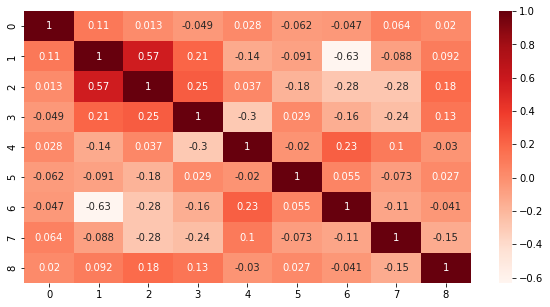

In [23]:
train_X = pd.DataFrame(train_X)
train_Y = pd.DataFrame(train_Y)

# plot a correlation matrix
plt.figure(figsize=(10,5))
cor = train_X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Feature Importance

0: 0.05506640051839877
1: 0.02111594978042377
2: 0.3729377510914941
3: 0.03267010343950735
4: 0.12309043427200939
5: 0.14552764561094506
6: 0.05949241530399346
7: 0.10514625218307388
8: 0.08495304780015431


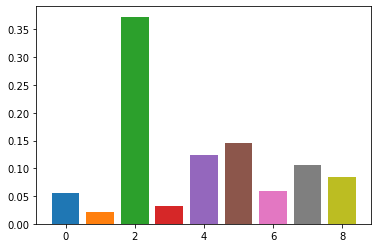

In [24]:
# Feature importance

classifier = DecisionTreeClassifier()
classifier.fit(train_X, train_Y)
for name, importance in zip(train_X.columns, classifier.feature_importances_):
    print(f'{name}: {importance}')
    # plot feature importance
    plt.bar(name, importance)
plt.show()

### K-Means

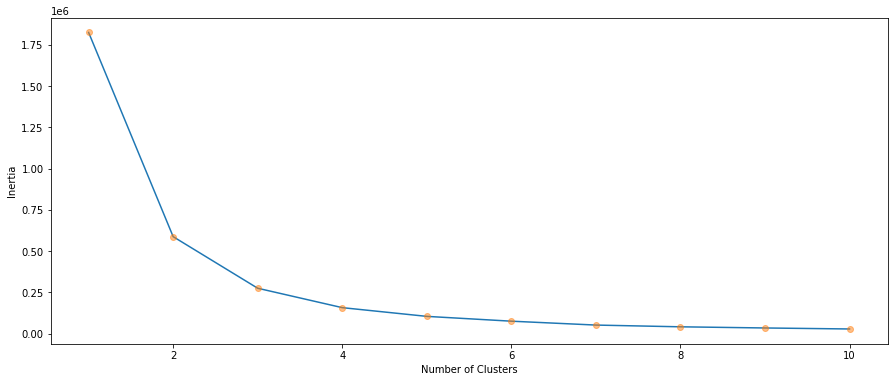

In [25]:
# Age & Spending Score
x_1 = df_new[['Age' , 'Spending_Score']].iloc[: , :].values
inertia = []
for i in range(1 , 11):
    algorithm = KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 105  , algorithm='elkan')
    algorithm.fit(x_1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , '-')
plt.plot(np.arange(1 , 11) , inertia , 'o' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

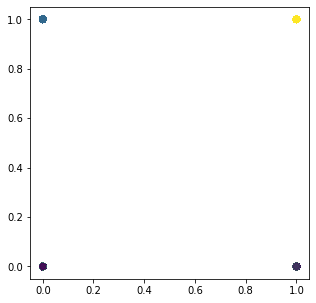

In [26]:
# K-means model
f, ax = plt.subplots(figsize = (5,5))

kmeans_model = KMeans(n_clusters= 4, init='k-means++',random_state=103)
y_kmeans_train = kmeans_model.fit_predict(train_X)

plt.scatter(train_X.iloc[:,0], train_X.iloc[:,1], c=y_kmeans_train, alpha=0.7, s=40)

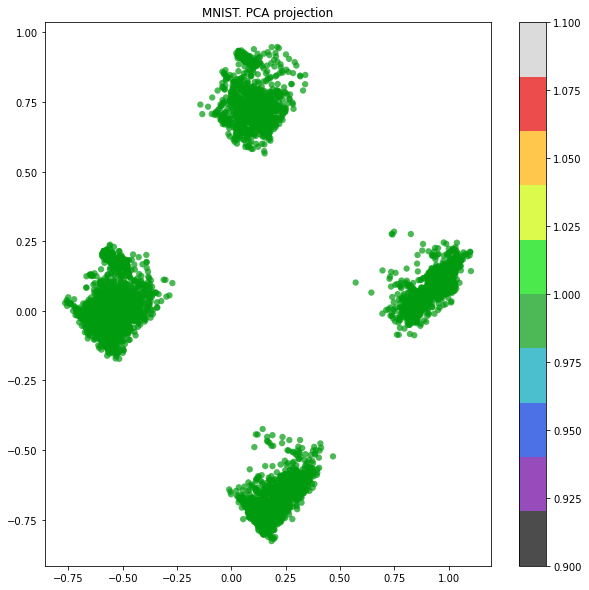

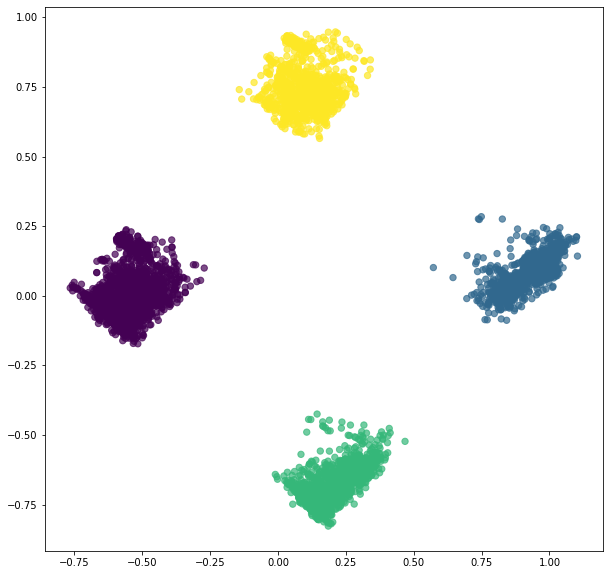

In [27]:
from sklearn.decomposition import PCA
from sklearn import preprocessing, decomposition
# Gender & Spending Score
pca = decomposition.PCA(n_components=2)
reduced_train_X = pca.fit_transform(train_X.drop(columns=[0,6]))

plt.figure(figsize=(10,10))
plt.scatter(reduced_train_X[:, 0], reduced_train_X[:, 1], c=[1]*train_X.shape[0], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

f, ax  = plt.subplots(figsize = (10,10))

kmeansmodel = KMeans(n_clusters= 4, init='k-means++',random_state=102)
y_kmeans_train = kmeansmodel.fit_predict(reduced_train_X)

plt.scatter(reduced_train_X[:,0], reduced_train_X[:,1], c=y_kmeans_train, alpha=0.7, s=40)